## Homework 5

In [19]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
import math


### Questions 5,6,7

In [26]:
def Eval(w):
    u = w[0]
    v = w[1]
    val = ((u*math.exp(v))-(2*v*math.exp(-u)))**2
    return(val)


def d_E(w):
    u = w[0]
    v = w[1]
    d_u = 2*((u*math.exp(v))-(2*v*math.exp(-u)))*(math.exp(v)+(2*v*math.exp(-u)))
    d_v = 2*((u*math.exp(v))-(2*v*math.exp(-u)))*((u*math.exp(v))-(2*math.exp(-u)))
    return np.array([d_u,d_v])

def min_E():
    w_curr = np.array([1,1])
    eta = 0.1
    i = 1
    err = 1e+14
    while err > 1e-14:
        w_curr = w_curr - eta*d_E(w_curr)
        err = Eval(w_curr)
        i = i+1
    print("Error at Step {} : {}".format(i-1,err))
    print("New val at Step {} : {}".format(i-1,w_curr))
#         print("New Error at Step {} : {}".format(i,Eval(w_curr)))
#         print("--------------")

def min_E2():
    w_curr = np.array([1,1])
    eta = 0.1
    for i in range(15):
#         print("Error at Step {} : {}".format(i,Eval(w_curr)))
#         print("Curr val at Step {} : {}".format(i,w_curr))

#         print("Derivative at Step {} : {}".format(i,d_E(w_curr)))
        w_1 = d_E(w_curr)

        w_1[1] = 0
#         print(w_1)
        w_curr = w_curr - eta*w_1
#         print(w_curr)
#         print("Curr val at First move : {}".format(w_curr))
#         print("New Error at First move : {}".format(Eval(w_curr)))

#         print("Derivative at Step {} : {}".format(i,d_E(w_curr)))
        w_2 = d_E(w_curr)
        w_2[0] = 0
#         print(w_2)
        w_curr = w_curr - eta*w_2
#         print("Curr val at Second move : {}".format(w_curr))

    print("Coordinate Descent Error at Step {} : {}".format(i+1,Eval(w_curr)))
#         print("--------------") 
        
min_E()
min_E2()

Error at Step 10 : 1.2086833944220747e-15
New val at Step 10 : [ 0.04473629  0.02395871]
Coordinate Descent Error at Step 15 : 0.13981379199615315


In [29]:
def getRandomLine():
    p = np.random.uniform(-1,1,(2,2))
    m = (p[0,1] - p[1,1])/(p[0,0]-p[1,0])
    x = np.array([-1.1,1.1])
    y = m*(x-p[0,0])+p[0,1]
    return (x,y)

def getLabels(D,l=-1,vec = np.array([[0],[0],[0]])):
#     print(l[0],l[1])
    if (l!=-1):
        x = l[0]
        y = l[1]
        m = (y[0] - y[1])/(x[0]-x[1])
        t1 = -(m*(D[:,0]-x[0])+y[0]-D[:,1])
        return t1/abs(t1)
    if (np.any(vec)):
        A = np.hstack((np.ones([D.shape[0],1]),D))
        t4_1 = np.matmul(A,vec)
    #     print("Current W : {}".format(w[:,0]))
    #     print(t4_1)
        t5_1 = [int(k) for k in (t4_1/abs(t4_1)).flatten().tolist()]
        return t5_1
        

def draw(dat,lab=np.zeros(0),l=-1,col='gray',vec = np.array([[0],[0],[0]])):
    plt.figure(figsize=(5,5))
    plt.xlim([-1.1,1.1])
    plt.ylim([-1.1,1.1])
    if (l!=-1):
        x = l[0]
        y = l[1]
        plt.plot([x[0], x[1]], [y[0], y[1]], color='k', linestyle='-', linewidth=2)
    if (np.any(vec)):
        l2 = vectoline(vec)
        x = l2[0]
        y = l2[1]
        plt.plot([x[0], x[1]], [y[0], y[1]], color='g', linestyle='-', linewidth=2)
    if (len(lab) != 0):
        plt.scatter(dat[:,0], dat[:,1],c=lab,cmap=col)
    else:
        plt.scatter(dat[:,0], dat[:,1])
    ax = plt.gca()

    plt.show()
    
def crossEntropyErr(X,y,w):
    sum = 0
    for i in range(X.shape[0]):
        c_X = X[i].reshape(3,1)
        sum = sum + math.log(1+math.exp(y[i]*(np.matmul(w.T,c_X))[0][0]*-1))
    return(sum/X.shape[0])
    
def logReg(X,target):
#     draw(D,lab=target)
    eta = 0.01
    wcurr = np.array([[0],[0],[0]])
    absdiff = 1000000
    epoch = 1
    while absdiff > 0.01:
        ewcurr = wcurr
        idx = np.random.permutation(X.shape[0])
        for i in range(X.shape[0]):
            c_X = X[idx[i]].reshape(3,1)
            v1 = np.matmul(wcurr.T,c_X)*target[idx[i]]
            v2 = 1/(math.exp(v1[0][0])+1)
            grad = c_X*target[idx[i]]*v2*(-1)
            wnew = wcurr - eta*grad
            wcurr = wnew
        ewnew = wcurr
        wdiff = ewnew-ewcurr
        absdiff = math.sqrt(np.matmul(wdiff.T,wdiff)[0][0])
        ewcurr = ewnew
        epoch = epoch+1
#     print("Epoch {} : {}".format(epoch,absdiff))

    return((epoch,ewcurr))

def vectoline(vec):
    w = vec[:,0]
#     print(w[0],w[1],w[2])
    x = np.array([-1.1,1.1])
    y = (-w[0]-w[1]*x)/w[2]
    return (x,y)

    
def Pdraw(D,w,target):
    print("Drawing regions")
    A = np.hstack((np.ones([D.shape[0],1]),D))
    t4_1 = np.matmul(A,w)
#     print(t4_1)
#     print("Current W : {}".format(w[:,0]))
#     print(t4_1)
    t5_1 = [int(k) for k in (t4_1/abs(t4_1)).flatten().tolist()]
#     print(t5_1)
#     print(target)
    t7 = abs(t5_1+target)-1
    t7_1 = t5_1==target
#     print(t7_1)
#     print("Y0 : {}".format(target))
#     print("Y1 : {}".format(t5_1))
#     print(t7)
    draw(D,l=vectoline(w),lab=t7_1)


    
def runExperiment1(k1,k2,numiter):
    v_ein = np.zeros(numiter)
    v_eout = np.zeros(numiter)
    v_epoch = np.zeros(numiter)
    
    for ix in range(numiter):
        D = np.random.uniform(-1,1,(k1,2))
        l1 = getRandomLine()
        target = getLabels(D,l=l1)
        X = np.hstack((np.ones([D.shape[0],1]),D))
        (epoch,ewcurr) = logReg(X,target)
        v_epoch[ix] = epoch
#         draw(D,lab = target,l=l1)
#         Pdraw(D,ewcurr,target)
        v_ein[ix] = crossEntropyErr(X,target,ewcurr)
        D2 = np.random.uniform(-1,1,(k2,2))
        X2 = np.hstack((np.ones([D2.shape[0],1]),D2))
        target2 = getLabels(D2,l=l1)
        v_eout[ix] = crossEntropyErr(X2,target2,ewcurr)
    print("Ein : {}".format(sum(v_ein)/numiter))
    print("Eout : {}".format(sum(v_eout)/numiter))
    print("Epoch : {}".format(sum(v_epoch)/numiter))



# runExperiment1(100,100000,1)

This next run was run with the draw() calls uncommented to visualize the problem for two runs

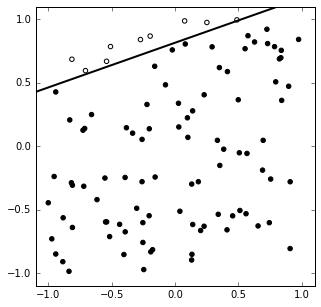

Drawing regions


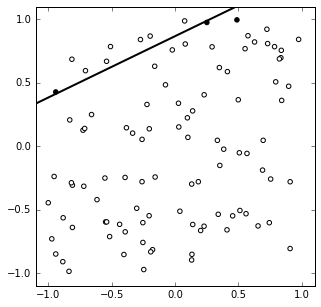

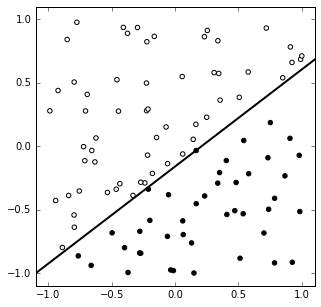

Drawing regions


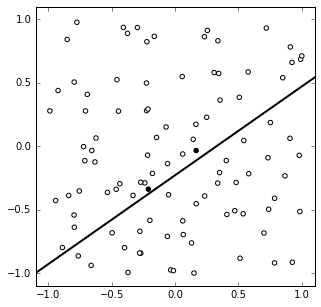

Ein : 0.09709655690408181
Eout : 0.1022464768899624
Epoch : 352.0


In [28]:
runExperiment1(100,100000,2)

This next run was run with the draw() calls commented out

In [10]:
runExperiment1(100,100000,100)

Ein : 0.09222405212154752
Eout : 0.10274061563850534
Epoch : 337.52
